In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from numpy import arange

In [66]:
raw_data = pd.read_csv('data/train.csv')
data = raw_data.drop('label', axis=1)

In [67]:
# Make Principal component analysis
pca = PCA(n_components=None)
pca = pca.fit(data)

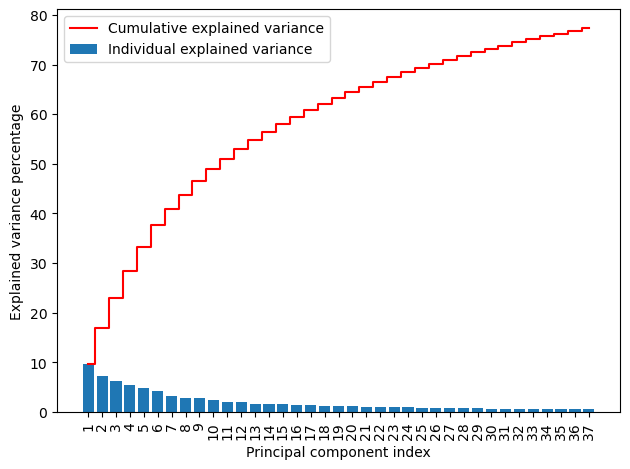

In [68]:
# Plot the graph of variance percentage per principal component
explained_variance = pca.explained_variance_ratio_ * 100
explained_variance_significant = explained_variance[explained_variance >= 0.5]
cumulative_explained_variance = np.cumsum(explained_variance_significant)
number_of_significant_components = len(explained_variance_significant)

plt.bar(range(1, number_of_significant_components + 1), explained_variance_significant, align='center', label='Individual explained variance')
plt.step(range(1, number_of_significant_components + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=arange(1, number_of_significant_components + 1), rotation='vertical')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

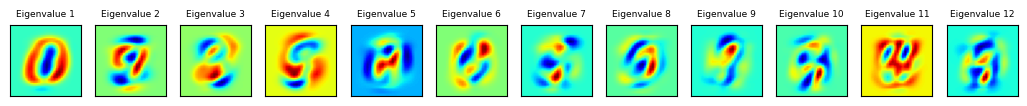

In [69]:
# Plot eigenvalues images for principal components
eigenvalues = pca.components_.reshape(784, 28, 28)
n_col = 12
plt.figure(figsize=(13, 12))

for i in list(range(n_col)):
    offset = 0
    plt.subplot(1, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28, 28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())

plt.show()

<Axes: >

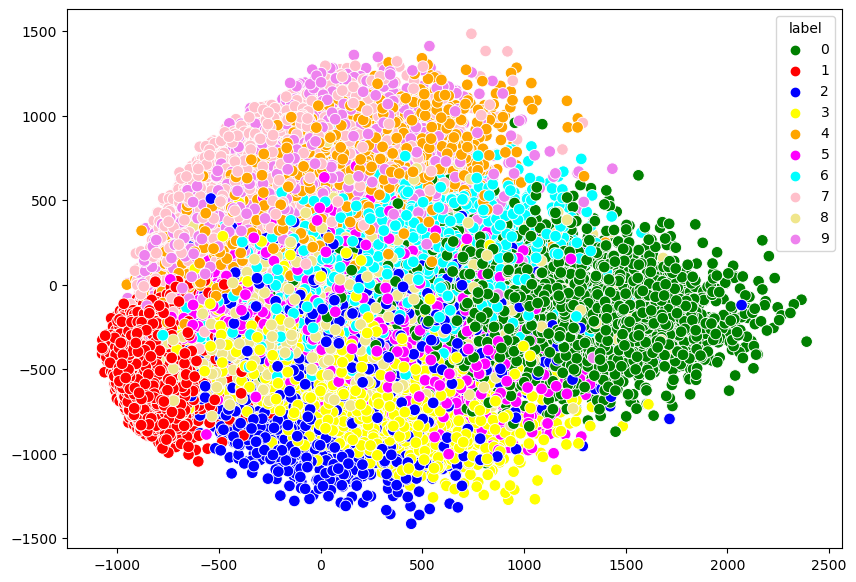

In [75]:
# Plot two principal components on scatter plot
x = pca.transform(data)
plt.figure(figsize=(10, 7))
sns.scatterplot(x = x[:, 0], y = x[:, 1], s= 70, hue=raw_data['label'], palette=['green', 'red', 'blue', 'yellow', 'orange', 'magenta', 'cyan', 'pink', 'khaki', 'violet'])